<a href="https://colab.research.google.com/github/Karthikard/ML-projects/blob/main/email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
df = pd.read_excel('email.xlsx')

In [19]:
df.head()

,from,date,Category,subject,body
0,Google <no-reply@accounts.google.com>,"Tue, 16 Sep 2025 09:10:38 +0000",Important,Security alert,[image: Google]\n\nYou allowed Microsoft apps ...
1,Streamlit Team <streamlitcommunity@snowflake.com>,"Mon, 08 Sep 2025 10:17:47 -0500",Important,Deploying apps with Streamlit Community Cloud 🚀,"A few helpful Streamlit tips\nHey Karthika, &#..."
2,portal.ssc@nic.in,"Tue, 16 Apr 2024 15:01:54 +0000",Important,SSC OTP Verification,"<p>Dear Candidate,</p>\n <p>Your OTP ..."
3,Surya Sunil K <surya.sunilk@tcs.com>,"Tue, 07 May 2024 02:07:34 +0000",Important,TCS NQT Hiring_Admit Card Released!,"TCS Confidential\n\n\nDear Candidate,\n\nGreet..."
4,TCS Recruitment - Entry Level <recruitment.ent...,"Fri, 12 Apr 2024 19:04:38 +0530",Important,TCS Recruitment: Registration Successful.,NaN


Natural Language Toolkit (NLTK) : for text processing and natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, POS tagging, and more.

**Tokenization :** Breaking text into smaller units (tokens), usually words or sentences. "hello","how","are","u".

**Stemming :** Reducing words to their root or base form by chopping off suffixes. running --> run , happily --> happili(may not produce real words)

**Lemmatization :** Reducing words to their dictionary/base form (lemma), using context and part of speech.("running", pos="v")  # Output: run
("better", pos="a")  # Output: good

**POS Tagging** (Part-of-Speech Tagging) :
Labeling each word with its part of speech (noun, verb, adjective, etc.).

**Stopwords :** Stopwords are common words like "the", "is", "and"

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Download NLTK data

WordNet: A large lexical database of English, used for lemmatization.

OMW (Open Multilingual WordNet): Provides additional word forms and supports multiple languages

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
#Replaces any missing values (NaN) in the subject column with an empty string ''.
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('') #combining the subject and body columns
df['text'] . head()

,text
0,Security alert [image: Google]\n\nYou allowed ...
1,Deploying apps with Streamlit Community Cloud ...
2,"SSC OTP Verification <p>Dear Candidate,</p>\n ..."
3,TCS NQT Hiring_Admit Card Released! TCS Confid...
4,TCS Recruitment: Registration Successful.


Text Preprocessing Function

In [23]:
import re

In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers.Keeps only letter and spaces.
    words = text.split() #Tokenize by splitting on spaces and splitters
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return ' '.join(words)   #Join back into a single string

df['text_clean'] = df['text'].apply(preprocess_text)


Encode Labels
converts strings to numbers for category. similar to one hot encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_label'] = le.fit_transform(df['Category'])

In [26]:
df.head()

,from,date,Category,subject,body,text,text_clean,category_label
0,Google <no-reply@accounts.google.com>,"Tue, 16 Sep 2025 09:10:38 +0000",Important,Security alert,[image: Google]\n\nYou allowed Microsoft apps ...,Security alert [image: Google]\n\nYou allowed ...,security alert image google allowed microsoft ...,1
1,Streamlit Team <streamlitcommunity@snowflake.com>,"Mon, 08 Sep 2025 10:17:47 -0500",Important,Deploying apps with Streamlit Community Cloud 🚀,"A few helpful Streamlit tips\nHey Karthika, &#...",Deploying apps with Streamlit Community Cloud ...,deploying apps streamlit community cloud helpf...,1
2,portal.ssc@nic.in,"Tue, 16 Apr 2024 15:01:54 +0000",Important,SSC OTP Verification,"<p>Dear Candidate,</p>\n <p>Your OTP ...","SSC OTP Verification <p>Dear Candidate,</p>\n ...",ssc otp verification pdear candidatep pyour ot...,1
3,Surya Sunil K <surya.sunilk@tcs.com>,"Tue, 07 May 2024 02:07:34 +0000",Important,TCS NQT Hiring_Admit Card Released!,"TCS Confidential\n\n\nDear Candidate,\n\nGreet...",TCS NQT Hiring_Admit Card Released! TCS Confid...,tc nqt hiringadmit card released tc confidenti...,1
4,TCS Recruitment - Entry Level <recruitment.ent...,"Fri, 12 Apr 2024 19:04:38 +0530",Important,TCS Recruitment: Registration Successful.,NaN,TCS Recruitment: Registration Successful.,tc recruitment registration successful,1


In [27]:
df.shape

(2840, 8)

Split Data

In [28]:
from sklearn.model_selection import train_test_split

X = df['text_clean']
y = df['category_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**TF-IDF Vectorization **
To convert text into numerical features.

TF (Term Frequency): How often a word appears in a document.

IDF (Inverse Document Frequency): How rare a word is across all documents.

TF-IDF: Gives higher weight to important words and lower weight to common words (like “the”, “is”).

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Grid Search

In [33]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_params ={
    'svm' :
    {
        'model' : svm.SVC(gamma = 'auto'),
        'params' :
        {
            'C' : [1,10,20] ,
            'kernel' : ['rbf','linear']
        }
    },

    'dt' :
    {
        'model' : DecisionTreeClassifier(),
        'params' :
        {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best' , 'random']
        }
    },

    'lr' :
    {
        'model' : LogisticRegression(max_iter=1000),
        'params' :
        {
            'C' : [1,5,10],
            'penalty' : ['l1','l2'],
            'solver' : ['liblinear']
        }
    },
    'mnb' :
    {
        'model' : MultinomialNB(),
        'params' : {}
    }

}

In [34]:
scores = []

for model_name , mp in model_params.items():
  clf = GridSearchCV(mp['model'] , mp['params'] , cv = 5 , return_train_score = False)
  clf.fit(X_train_tfidf, y_train)
  scores.append(
      {
          'model' : model_name,
          'best_score' : clf.best_score_,
          'best_params' : clf.best_params_
      }
  )

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
df1 = pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])
df1


,model,best_score,best_params
0,svm,0.929577,"{'C': 1, 'kernel': 'linear'}"
1,dt,0.892607,"{'criterion': 'entropy', 'splitter': 'random'}"
2,lr,0.930459,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
3,mnb,0.911534,{}


**Train Multiclass Classifier**

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [36]:
svm = svm.SVC(C=1, kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

Evaluate Model

Accuracy: 0.9102112676056338
              precision    recall  f1-score   support

     Finance       0.92      0.96      0.94        71
   Important       0.81      0.72      0.76        71
    Personal       0.83      0.90      0.87       126
  Promotions       0.96      0.96      0.96        72
Social_media       0.97      0.97      0.97        72
        Spam       0.94      0.85      0.89        74
 Verify_code       0.99      1.00      0.99        82

    accuracy                           0.91       568
   macro avg       0.92      0.91      0.91       568
weighted avg       0.91      0.91      0.91       568



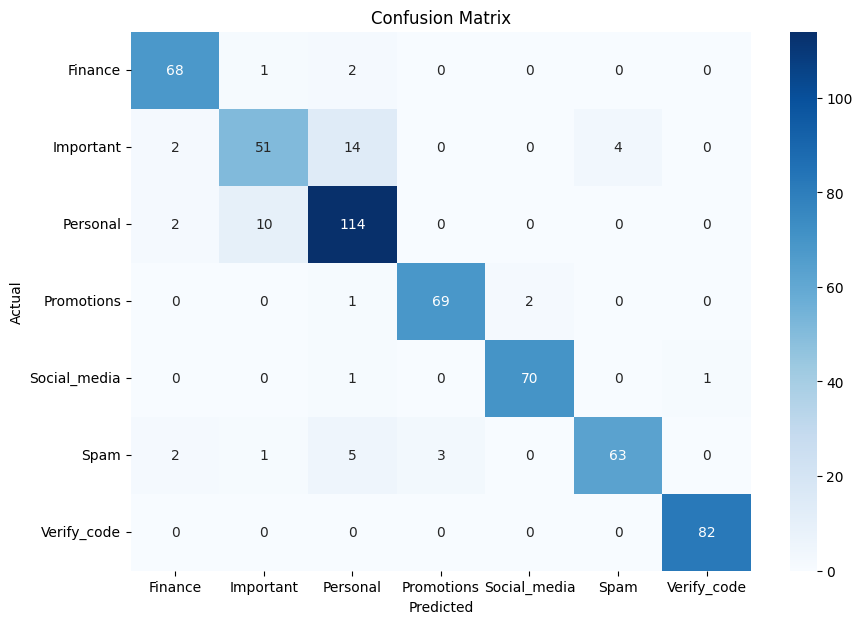

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9401408450704225
              precision    recall  f1-score   support

     Finance       0.96      0.97      0.97        71
   Important       0.82      0.85      0.83        71
    Personal       0.93      0.90      0.92       126
  Promotions       1.00      0.92      0.96        72
Social_media       0.97      0.97      0.97        72
        Spam       0.91      0.99      0.95        74
 Verify_code       0.99      1.00      0.99        82

    accuracy                           0.94       568
   macro avg       0.94      0.94      0.94       568
weighted avg       0.94      0.94      0.94       568



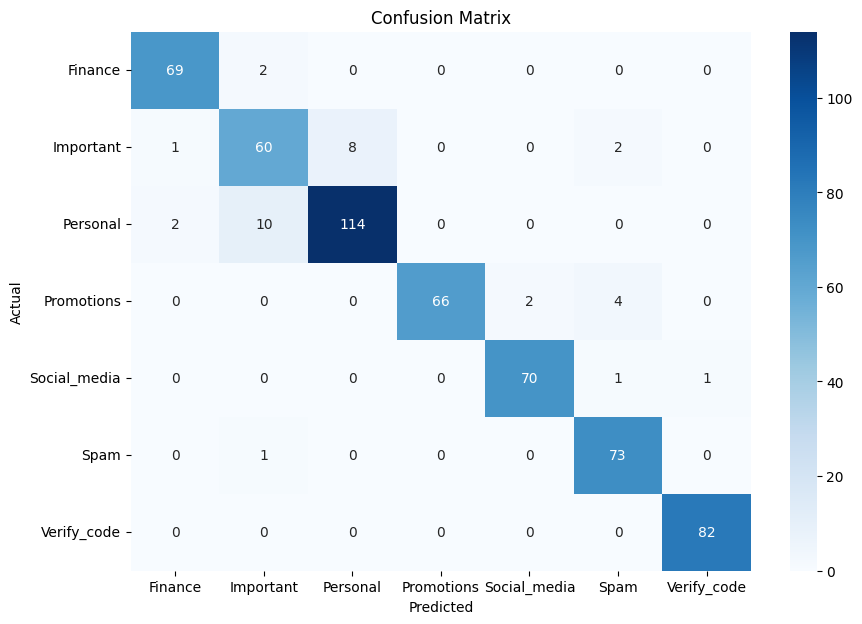

In [37]:
# Predict on test data
y_pred = svm.predict(X_test_tfidf)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()